Importing all the important libraries and the Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import graphviz 
from statsmodels.tsa.seasonal import STL

# Import DataSet
Credit_Risk_DataSet = pd.read_csv('Credit_Risk_32_final.csv')

a). Exploratory Data Analysis (EDA): - Carry out EDA on the data set; do you notice anything unusual (missing data, outliers, duplicates etc.) or any patterns with the data set? Detail these and outline any actions you propose to take before you start model building in part b). Max word count 500.

In [2]:
# Display the Basic information on Credit_Risk_32_final dataset
Credit_Risk_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  904 non-null    int64  
 1   Checking.Acct                       904 non-null    object 
 2   Credit History                      904 non-null    object 
 3   Loan Reason                         904 non-null    object 
 4   Savings_Acct                        904 non-null    object 
 5   Employment                          893 non-null    object 
 6   Personal_Status                     898 non-null    object 
 7   Housing                             899 non-null    object 
 8   Job.Type                            904 non-null    object 
 9   Foreign.National                    904 non-null    object 
 10  Months.since.Checking.Acct.opened   904 non-null    int64  
 11  Residence.Time.In.current.district  904 non-n

In [3]:
# Display DataSet Description
Credit_Risk_DataSet.describe()

,ID,Months.since.Checking.Acct.opened,Residence.Time.In.current.district,Age,Credibility_score,check
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,452.500000,22.966814,2.876106,37.850774,94.835975,0.584071
std,261.106619,12.608291,1.153801,12.579097,30.016611,0.493154
min,1.000000,5.000000,-2.000000,19.000000,47.533972,0.000000
25%,226.750000,13.000000,2.000000,28.300000,71.328690,0.000000
50%,452.500000,19.000000,3.000000,35.000000,88.370954,1.000000
75%,678.250000,28.000000,4.000000,44.750000,112.283760,1.000000
max,904.000000,120.000000,10.000000,151.000000,214.551858,1.000000


In [4]:
# Chect for Missing Values
Credit_Risk_DataSet.isnull().sum()

ID                                     0
Checking.Acct                          0
Credit History                         0
Loan Reason                            0
Savings_Acct                           0
Employment                            11
Personal_Status                        6
Housing                                5
Job.Type                               0
Foreign.National                       0
Months.since.Checking.Acct.opened      0
Residence.Time.In.current.district     0
Age                                    0
Credibility_score                      0
check                                  0
Reg State                              0
Credit.Standing                        2
dtype: int64

In [5]:
Credit_Risk_DataSet = Credit_Risk_DataSet.drop('ID', axis=1).copy()
Credit_Risk_DataSet.duplicated().sum()

97

In [6]:
Credit_Risk_Clean = Credit_Risk_DataSet.drop_duplicates()

In [7]:
Credit_Risk_Clean.shape

(807, 16)

In [8]:
Credit_Risk_Clean.head()

,Checking.Acct,Credit History,Loan Reason,Savings_Acct,Employment,Personal_Status,Housing,Job.Type,Foreign.National,Months.since.Checking.Acct.opened,Residence.Time.In.current.district,Age,Credibility_score,check,Reg State,Credit.Standing
0,No Acct,All Paid,Car New,Low,Medium,Single,Own,Management,No,7,3,50.8,127.505447,1,Ind,Good
1,0Balance,Current,Car New,Low,Short,Divorced,Own,Skilled,No,16,2,28.0,70.058875,0,Different,Bad
2,0Balance,Current,Car New,No Acct,Long,Divorced,Own,Skilled,No,25,2,28.0,70.204601,0,Different,Bad
3,0Balance,Current,Furniture,No Acct,Long,NaN,Own,Skilled,No,31,4,35.4,89.281471,1,Same,Good
4,No Acct,All Paid,Small Appliance,No Acct,Long,Single,Other,Skilled,Yes,7,4,40.3,101.002682,1,Ind,Good


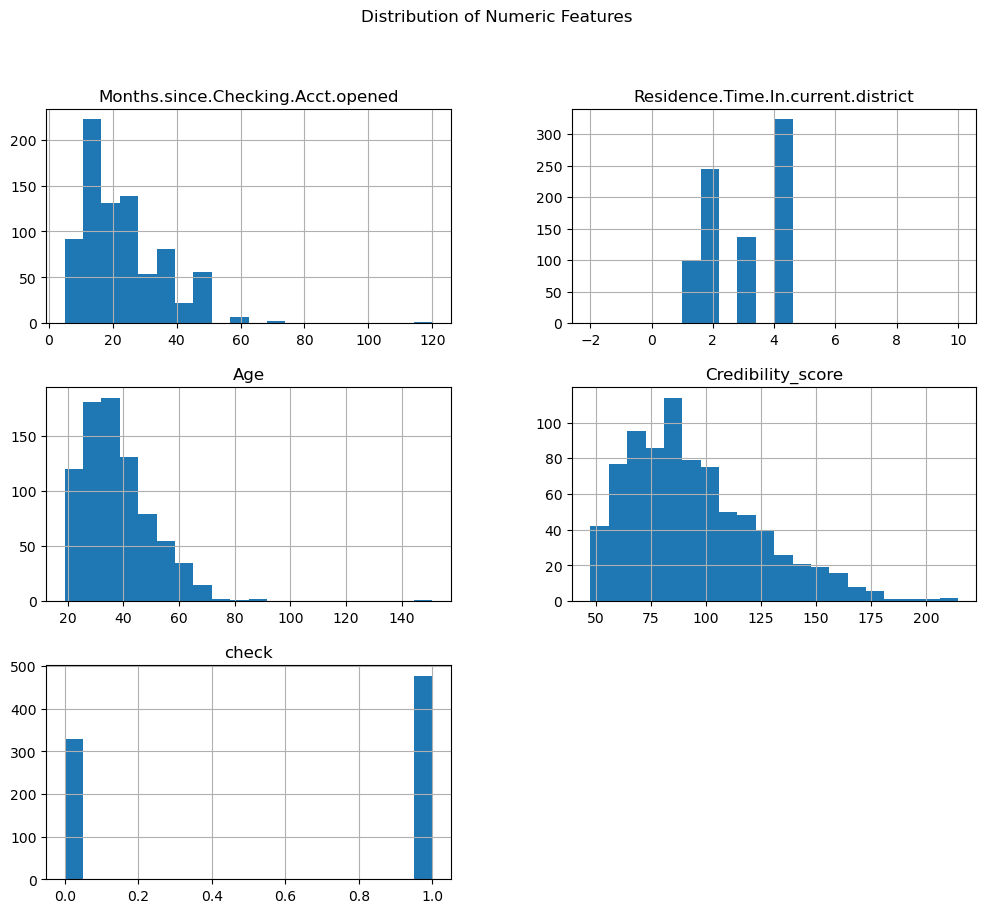

In [9]:
# Visualize distribution of numeric features
Credit_Risk_Clean.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

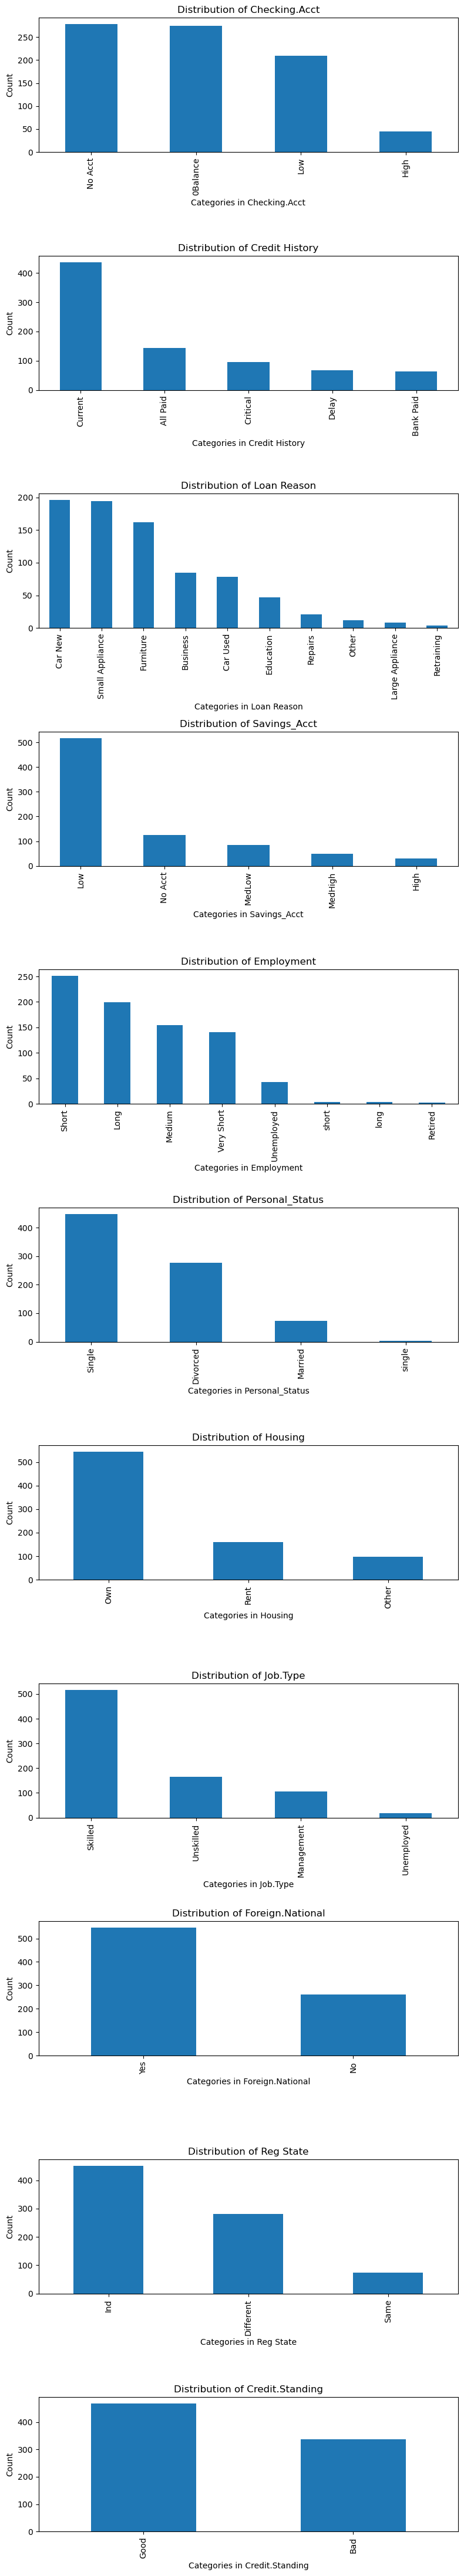

In [10]:
# Get the list of categorical columns
categorical_columns = Credit_Risk_Clean.select_dtypes(include=['object']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, 4 * len(categorical_columns)))

# Plot bar plots for each categorical column
for i, col in enumerate(categorical_columns):
    Credit_Risk_Clean[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_xlabel(f'Categories in {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


In [11]:
Credit_Risk_Clean['Employment'] = Credit_Risk_Clean['Employment'].str.capitalize()
Credit_Risk_Clean['Personal_Status'] = Credit_Risk_Clean['Personal_Status'].str.capitalize()

C:\Users\Admin\AppData\Local\Temp\ipykernel_59260\2797330713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit_Risk_Clean['Employment'] = Credit_Risk_Clean['Employment'].str.capitalize()
C:\Users\Admin\AppData\Local\Temp\ipykernel_59260\2797330713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit_Risk_Clean['Personal_Status'] = Credit_Risk_Clean['Personal_Status'].str.capitalize()


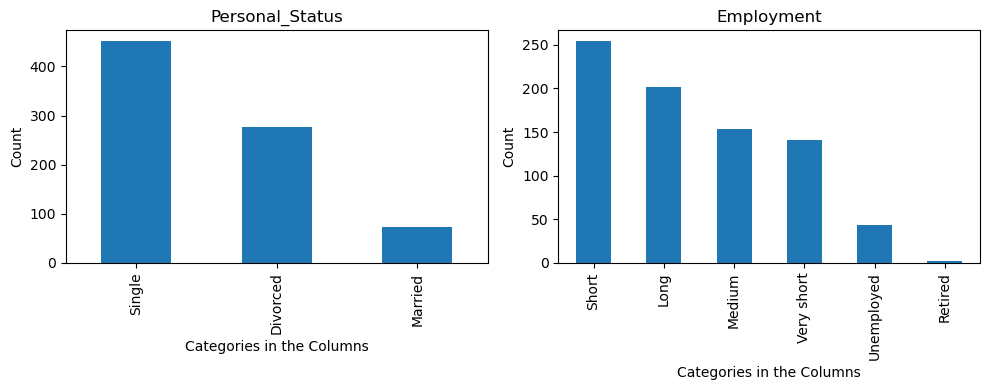

In [12]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the first graph
categorical_value_count_1 = Credit_Risk_Clean['Personal_Status'].value_counts()
categorical_value_count_1.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Categories in the Columns')
axes[0].set_ylabel('Count')
axes[0].set_title('Personal_Status')

# Plot the second graph
categorical_value_count_2 = Credit_Risk_Clean['Employment'].value_counts()
categorical_value_count_2.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Categories in the Columns')
axes[1].set_ylabel('Count')
axes[1].set_title('Employment')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


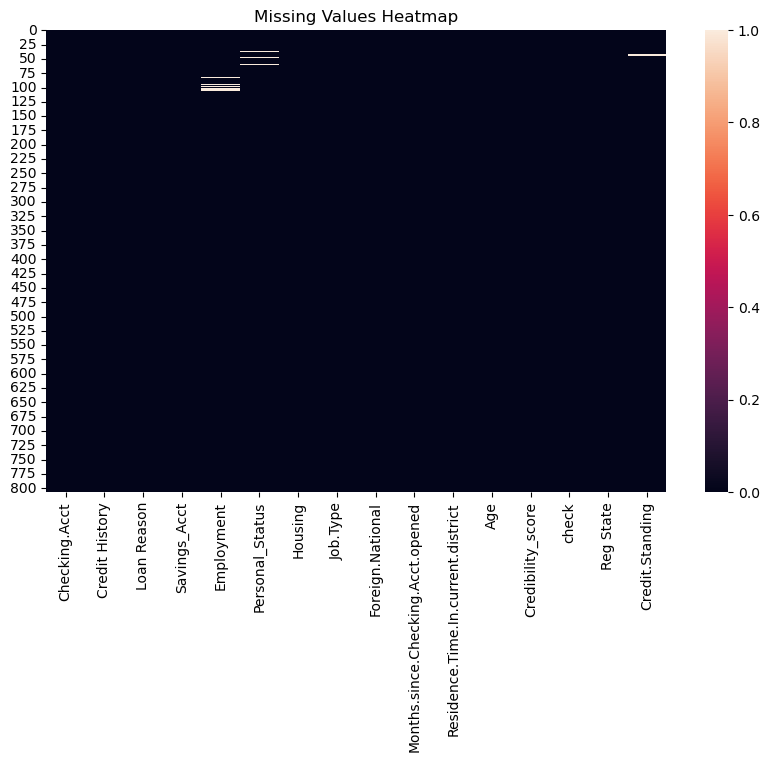

In [13]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(Credit_Risk_Clean.isnull())
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
working_dataset = Credit_Risk_Clean.copy()

label_encoder = LabelEncoder()
working_dataset['Checking.Acct_LE'] = label_encoder.fit_transform(working_dataset['Checking.Acct'])
working_dataset['Credit_History_LE'] = label_encoder.fit_transform(working_dataset['Credit History'])
working_dataset['Loan_Reason_LE'] = label_encoder.fit_transform(working_dataset['Loan Reason'])
working_dataset['Savings_Acct_LE'] = label_encoder.fit_transform(working_dataset['Savings_Acct'])
working_dataset['Employment_LE'] = label_encoder.fit_transform(working_dataset['Employment'])
working_dataset['Personal_Status_LE'] = label_encoder.fit_transform(working_dataset['Personal_Status'])
working_dataset['Housing_LE'] = label_encoder.fit_transform(working_dataset['Housing'])
working_dataset['Job.Type_LE'] = label_encoder.fit_transform(working_dataset['Job.Type'])
working_dataset['Foreign.National_LE'] = label_encoder.fit_transform(working_dataset['Foreign.National'])
working_dataset['Reg_State_LE'] = label_encoder.fit_transform(working_dataset['Reg State'])
working_dataset['Credit.Standing_LE'] = label_encoder.fit_transform(working_dataset['Credit.Standing'])

columns_to_drop_from_predictor_variable = [
    'Checking.Acct', 'Credit History', 'Loan Reason', 'Savings_Acct', 'Employment', 'Personal_Status', 'Housing', 'Job.Type', 'Foreign.National', 'Reg State', 'Credit.Standing'
    ]
working_dataset = working_dataset.drop(columns=columns_to_drop_from_predictor_variable, axis=1).copy()

In [15]:
imputer = KNNImputer(n_neighbors=20)
missing_values_columns = ['Employment_LE', 'Personal_Status_LE', 'Housing_LE', 'Credit.Standing_LE']
working_dataset[missing_values_columns] = imputer.fit_transform(working_dataset[missing_values_columns])

In [16]:
# Chect for Missing Values
working_dataset.isnull().sum()

Months.since.Checking.Acct.opened     0
Residence.Time.In.current.district    0
Age                                   0
Credibility_score                     0
check                                 0
Checking.Acct_LE                      0
Credit_History_LE                     0
Loan_Reason_LE                        0
Savings_Acct_LE                       0
Employment_LE                         0
Personal_Status_LE                    0
Housing_LE                            0
Job.Type_LE                           0
Foreign.National_LE                   0
Reg_State_LE                          0
Credit.Standing_LE                    0
dtype: int64

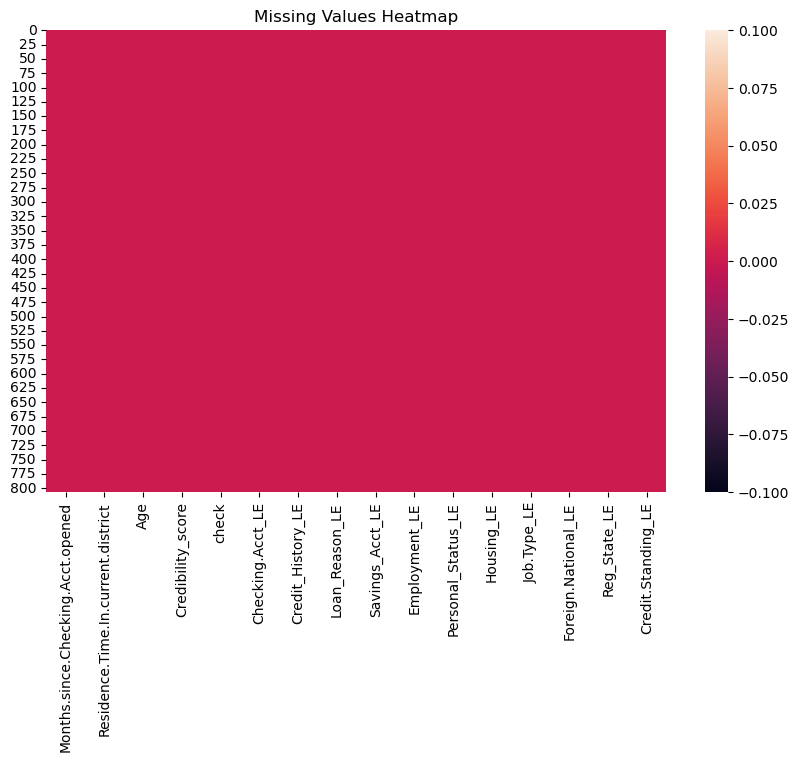

In [17]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(working_dataset.isnull())
plt.title('Missing Values Heatmap')
plt.show()

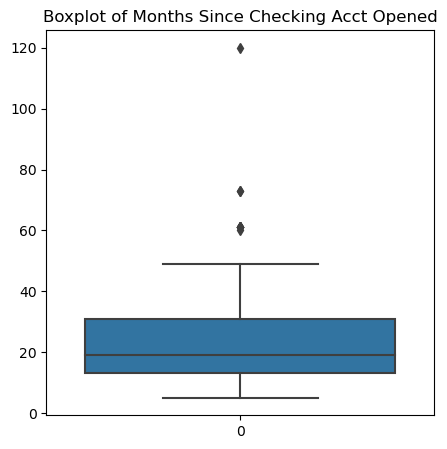

In [18]:
# Visualize Months.since.Checking.Acct.opened outliers using box plots
plt.figure(figsize=(5, 5))
sns.boxplot(data=working_dataset['Months.since.Checking.Acct.opened'])
plt.title('Boxplot of Months Since Checking Acct Opened')
plt.show()

In [19]:
# Calculate the first and third quartiles
Q1 = np.percentile(working_dataset['Months.since.Checking.Acct.opened'], 25)
Q3 = np.percentile(working_dataset['Months.since.Checking.Acct.opened'], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a threshold for outliers based on IQR
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (working_dataset['Months.since.Checking.Acct.opened'] < Q1 - outlier_threshold) | \
           (working_dataset['Months.since.Checking.Acct.opened'] > Q3 + outlier_threshold)

# Replace outliers with the mean
working_dataset['Months.since.Checking.Acct.opened'][outliers] = np.mean(working_dataset['Months.since.Checking.Acct.opened'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_59260\3009666360.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_dataset['Months.since.Checking.Acct.opened'][outliers] = np.mean(working_dataset['Months.since.Checking.Acct.opened'])


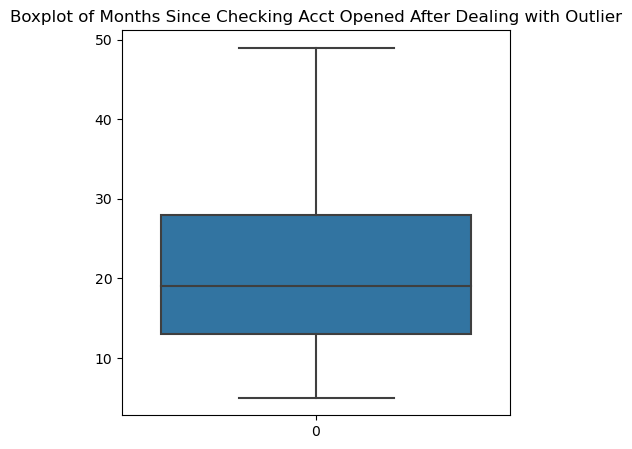

In [20]:
# Rechecking Months.since.Checking.Acct.opened outliers using box plots
plt.figure(figsize=(5, 5))
sns.boxplot(data=working_dataset['Months.since.Checking.Acct.opened'])
plt.title('Boxplot of Months Since Checking Acct Opened After Dealing with Outlier')
plt.show()

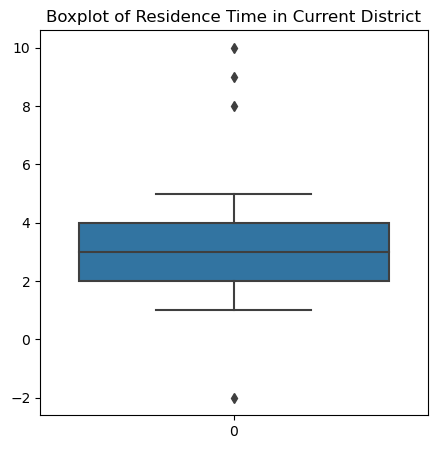

In [21]:
# Visualize Residence.Time.In.current.district outliers using box plots
plt.figure(figsize=(5,5))
sns.boxplot(data=working_dataset['Residence.Time.In.current.district'])
plt.title('Boxplot of Residence Time in Current District')
plt.show()

In [22]:
# Calculate the first and third quartiles
Q1 = np.percentile(working_dataset['Residence.Time.In.current.district'], 25)
Q3 = np.percentile(working_dataset['Residence.Time.In.current.district'], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a threshold for outliers based on IQR
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (working_dataset['Residence.Time.In.current.district'] < Q1 - outlier_threshold) | \
           (working_dataset['Residence.Time.In.current.district'] > Q3 + outlier_threshold)

# Replace outliers with the mean
working_dataset['Residence.Time.In.current.district'][outliers] = np.mean(working_dataset['Residence.Time.In.current.district'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_59260\1657591554.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_dataset['Residence.Time.In.current.district'][outliers] = np.mean(working_dataset['Residence.Time.In.current.district'])


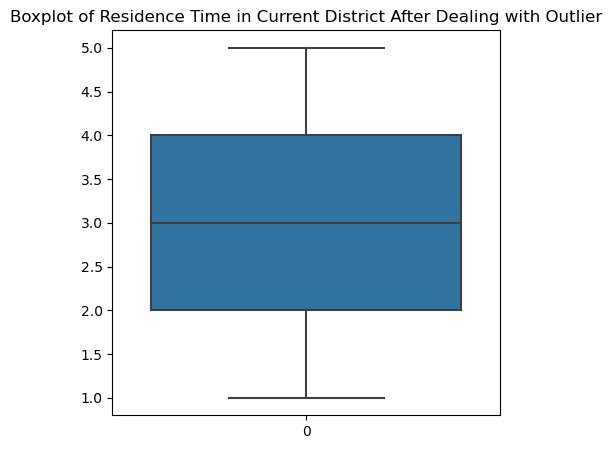

In [23]:
# Rechecking Residence.Time.In.current.district outliers using box plots
plt.figure(figsize=(5,5))
sns.boxplot(data=working_dataset['Residence.Time.In.current.district'])
plt.title('Boxplot of Residence Time in Current District After Dealing with Outlier')
plt.show()

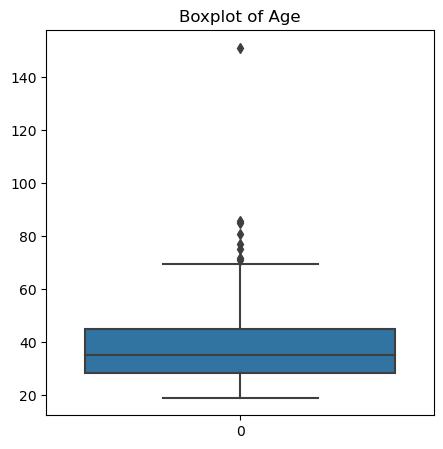

In [24]:
# Visualize Age outliers using box plots
plt.figure(figsize=(5,5))
sns.boxplot(data=working_dataset['Age'])
plt.title('Boxplot of Age')
plt.show()

In [25]:
# Calculate the first and third quartiles
Q1 = np.percentile(working_dataset['Age'], 25)
Q3 = np.percentile(working_dataset['Age'], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a threshold for outliers based on IQR
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (working_dataset['Age'] < Q1 - outlier_threshold) | \
           (working_dataset['Age'] > Q3 + outlier_threshold)

# Replace outliers with the mean
working_dataset['Age'][outliers] = np.mean(working_dataset['Age'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_59260\3679599412.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_dataset['Age'][outliers] = np.mean(working_dataset['Age'])


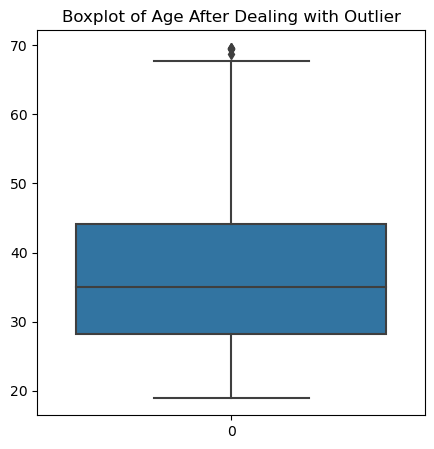

In [26]:
# Rechecking Age outliers using box plots
plt.figure(figsize=(5,5))
sns.boxplot(data=working_dataset['Age'])
plt.title('Boxplot of Age After Dealing with Outlier')
plt.show()

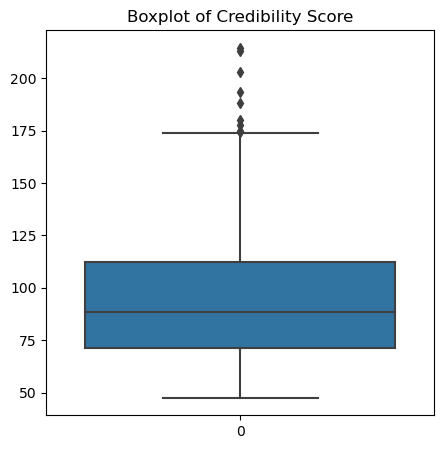

In [27]:
# Visualize Credibility Score outliers using box plots
plt.figure(figsize=(5,5))
sns.boxplot(data=working_dataset['Credibility_score'])
plt.title('Boxplot of Credibility Score')
plt.show()

In [28]:
# Calculate the first and third quartiles
Q1 = np.percentile(working_dataset['Credibility_score'], 25)
Q3 = np.percentile(working_dataset['Credibility_score'], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a threshold for outliers based on IQR
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (working_dataset['Credibility_score'] < Q1 - outlier_threshold) | \
           (working_dataset['Credibility_score'] > Q3 + outlier_threshold)

# Replace outliers with the mean
working_dataset['Credibility_score'][outliers] = np.mean(working_dataset['Credibility_score'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_59260\3719474050.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_dataset['Credibility_score'][outliers] = np.mean(working_dataset['Credibility_score'])


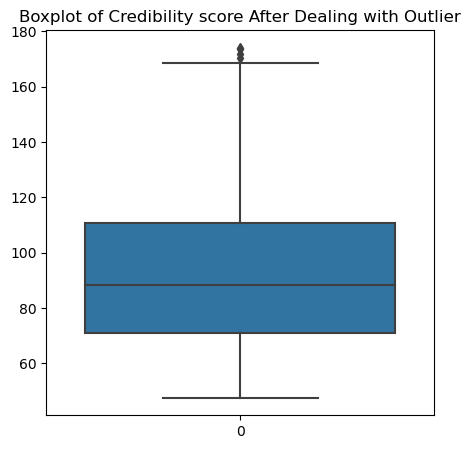

In [29]:
# Rechecking Credibility score outliers using box plots
plt.figure(figsize=(5,5))
sns.boxplot(data=working_dataset['Credibility_score'])
plt.title('Boxplot of Credibility score After Dealing with Outlier')
plt.show()

In [30]:
working_dataset.shape

(807, 16)

In [31]:
columns_to_drop = ['Months.since.Checking.Acct.opened', 'Residence.Time.In.current.district', 'Age', 'Credibility_score', 'check', 'Credit.Standing_LE']
Categorical_predictor_variable = working_dataset.drop(columns=columns_to_drop, axis=1).copy()
target_variable = working_dataset['check'].copy()

b). Split the dataset into 75% training and 25% test set using set.seed(abc) where abc are the last 3 digits of your student no. (Use this set.seed for all other functions with an element of randomness in this work).

In [32]:
# Set the seed for reproducibility
np.random.seed(242)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(Categorical_predictor_variable, target_variable, test_size=0.25)


c). Using the code given in the labs or otherwise, use base R (or python equivalent) to build code using the entropy formula to split only the categorical type predictor variables. Show which predictor variable should be used for the root node split. Use only the training set from b) to do this and you are not constrained to binary splits.

In [33]:
# Function to calculate entropy for a set of labels using the given formula
# Entropy = -Σ p(i) log2(p(i))
def calculate_entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Function to calculate the information gain for a categorical split
# Information Gain = Entropy(Target) - Weighted Entropy(Target | Feature)
def calculate_categorical_information_gain(data, target, feature):
    unique_values = data[feature].unique()
    total_entropy = calculate_entropy(target)

    weighted_entropy = 0
    for value in unique_values:
        subset_mask = data[feature] == value
        subset_target = target[subset_mask]
        subset_weight = len(subset_target) / len(target)
        weighted_entropy += subset_weight * calculate_entropy(subset_target)

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Find the best categorical feature for the root node split
def find_best_categorical_split(data, target):
    features = data.columns
    best_information_gain = -1
    best_feature = None

    print("Entropy and Information Gain for each categorical feature:")
    for feature in features:
        entropy = calculate_entropy(data[feature])
        information_gain = calculate_categorical_information_gain(data, target, feature)
        print(f"{feature}:Entropy = {entropy} Information Gain = {information_gain}")

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature = feature

    return best_feature

# Identify the best categorical feature for the root node split
root_feature = find_best_categorical_split(X_train, Y_train)
print("\nBest predictor variable for the root node split:", root_feature)


Entropy and Information Gain for each categorical feature:
Checking.Acct_LE:Entropy = 1.8102021198169236 Information Gain = 0.026064082879681982
Credit_History_LE:Entropy = 1.8846833430327037 Information Gain = 0.29537324513333707
Loan_Reason_LE:Entropy = 2.65982296002503 Information Gain = 0.01951865348116444
Savings_Acct_LE:Entropy = 1.5352472515271176 Information Gain = 0.0038247721470121565
Employment_LE:Entropy = 2.2303484397167708 Information Gain = 0.07008359735184977
Personal_Status_LE:Entropy = 1.375780370367237 Information Gain = 0.00933784494872314
Housing_LE:Entropy = 1.2724027783314367 Information Gain = 0.014241732295617648
Job.Type_LE:Entropy = 1.397282306906673 Information Gain = 0.01304706694191804
Foreign.National_LE:Entropy = 0.9032997196548633 Information Gain = 0.001408677954104376
Reg_State_LE:Entropy = 1.3244107239844025 Information Gain = 0.0022607420067923822

Best predictor variable for the root node split: Credit_History_LE


d). Now redo part c) but now you are constrained to only binary splits, i.e. a split with only 2 possible outcomes. Show how this affects your results and give reasons why this is the case.

In [34]:
# Function to calculate entropy for a set of labels using the given formula
def calculate_entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Function to calculate the information gain for a binary split of a categorical feature
def calculate_binary_categorical_information_gain(data, target, feature, split_value):
    left_mask = data[feature] == split_value
    right_mask = ~left_mask

    left_target = target[left_mask]
    right_target = target[right_mask]

    total_entropy = calculate_entropy(target)
    left_entropy = calculate_entropy(left_target)
    right_entropy = calculate_entropy(right_target)

    weighted_entropy = (len(left_target) / len(target)) * left_entropy + \
                       (len(right_target) / len(target)) * right_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Find the best binary split for a categorical feature
def find_best_binary_split(data, target, feature):
    unique_values = data[feature].unique()
    best_information_gain = -1
    best_split_value = None

    for value in unique_values:
        information_gain = calculate_binary_categorical_information_gain(data, target, feature, value)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_split_value = value

    return best_split_value

# Find the best categorical feature for the root node split
def find_best_categorical_split(data, target):
    features = data.columns
    best_information_gain = -1
    best_feature = None

    print("Entropy and Information Gain for each categorical feature:")
    for feature in features:
        split_value = find_best_binary_split(data, target, feature)
        entropy = calculate_entropy(data[feature])
        information_gain = calculate_binary_categorical_information_gain(data, target, feature, split_value)
        print(f"{feature}: Entropy = {entropy}, Information Gain = {information_gain}")

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature = feature

    return best_feature

# Identify the best categorical feature for the root node split
root_feature = find_best_categorical_split(X_train, Y_train)
print("\nBest predictor variable for the root node split:", root_feature)


Entropy and Information Gain for each categorical feature:
Checking.Acct_LE: Entropy = 1.8102021198169236, Information Gain = 0.024549910193421454
Credit_History_LE: Entropy = 1.8846833430327037, Information Gain = 0.18782922452813833
Loan_Reason_LE: Entropy = 2.65982296002503, Information Gain = 0.005951884803606866
Savings_Acct_LE: Entropy = 1.5352472515271176, Information Gain = 0.002854553855585862
Employment_LE: Entropy = 2.2303484397167708, Information Gain = 0.05780509369474163
Personal_Status_LE: Entropy = 1.375780370367237, Information Gain = 0.0063238300192959285
Housing_LE: Entropy = 1.2724027783314367, Information Gain = 0.014020488478705073
Job.Type_LE: Entropy = 1.397282306906673, Information Gain = 0.009648528847576499
Foreign.National_LE: Entropy = 0.9032997196548633, Information Gain = 0.001408677954104376
Reg_State_LE: Entropy = 1.3244107239844025, Information Gain = 0.002245569907822431

Best predictor variable for the root node split: Credit_History_LE


e). Now include the continuous numeric predictor variables, again use only a binary split. Which is now the root node split? Analyse your results and comment.

In [35]:
working_dataset.describe()

,Months.since.Checking.Acct.opened,Residence.Time.In.current.district,Age,Credibility_score,check,Checking.Acct_LE,Credit_History_LE,Loan_Reason_LE,Savings_Acct_LE,Employment_LE,Personal_Status_LE,Housing_LE,Job.Type_LE,Foreign.National_LE,Reg_State_LE,Credit.Standing_LE
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,22.591850,2.854380,37.336811,93.662380,0.592317,1.609665,2.273854,3.938042,1.702602,2.308550,1.230483,1.091698,1.301115,0.676580,0.743494,0.584882
std,11.557539,1.085635,11.310034,28.000864,0.491708,1.268068,1.260430,3.273872,1.194811,1.849207,0.937984,0.580081,0.939767,0.468072,0.612021,0.498055
min,5.000000,1.000000,19.000000,47.533972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,2.000000,28.250000,71.057486,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,19.000000,3.000000,35.000000,88.377348,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,28.000000,4.000000,44.150000,110.595514,1.000000,3.000000,3.000000,7.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,49.000000,5.000000,69.600000,174.112786,1.000000,3.000000,4.000000,9.000000,4.000000,6.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000


In [36]:
bins = [40, 60, 80, 100, 120, 140, 160, 180]
labels = ['40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180']
working_dataset['Credibility_score_range_c'] = pd.cut(working_dataset['Credibility_score'], bins=bins, labels=labels, include_lowest=True)

bins_age = [19, 29, 39, 49, 59, 69, 79]
labels_age = ['19-29', '29-39', '39-49', '49-59', '59-69', '69-79']
working_dataset['Age_range_c'] = pd.cut(working_dataset['Age'], bins=bins_age, labels=labels_age, include_lowest=True)

working_dataset

,Months.since.Checking.Acct.opened,Residence.Time.In.current.district,Age,Credibility_score,check,Checking.Acct_LE,Credit_History_LE,Loan_Reason_LE,Savings_Acct_LE,Employment_LE,Personal_Status_LE,Housing_LE,Job.Type_LE,Foreign.National_LE,Reg_State_LE,Credit.Standing_LE,Credibility_score_range_c,Age_range_c
0,7.0,3.0,50.8,127.505447,1,3,0,1,1,1.0,2.0,1.0,0,0,1,1.0,120-140,49-59
1,16.0,2.0,28.0,70.058875,0,0,3,1,1,3.0,0.0,1.0,1,0,0,0.0,60-80,19-29
2,25.0,2.0,28.0,70.204601,0,0,3,1,4,0.0,0.0,1.0,1,0,0,0.0,60-80,19-29
3,31.0,4.0,35.4,89.281471,1,0,3,4,4,0.0,3.0,1.0,1,0,2,1.0,80-100,29-39
4,7.0,4.0,40.3,101.002682,1,3,0,9,4,0.0,2.0,0.0,1,1,1,1.0,100-120,39-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,10.0,4.0,40.6,102.341324,1,2,0,9,1,0.0,2.0,1.0,3,0,1,1.0,100-120,39-49
803,13.0,4.0,34.0,85.888039,0,0,3,2,1,0.0,2.0,0.0,1,1,1,0.0,80-100,29-39
804,10.0,4.0,55.0,137.722568,1,0,0,7,3,0.0,2.0,1.0,1,1,1,1.0,120-140,49-59
805,13.0,3.0,23.0,58.090023,0,0,3,9,1,3.0,2.0,1.0,3,1,1,0.0,40-60,19-29


In [37]:
working_dataset['Credibility_score_range'] = label_encoder.fit_transform(working_dataset['Credibility_score_range_c'])
working_dataset['Age_range'] = label_encoder.fit_transform(working_dataset['Age_range_c'])

columns_to_drop = ['Credibility_score', 'check', 'Credit.Standing_LE', 'Age', 'Credibility_score_range_c', 'Age_range_c']
predictor_variable_all = working_dataset.drop(columns=columns_to_drop, axis=1).copy()
target_variable = working_dataset['check'].copy()

In [38]:
predictor_variable_all

,Months.since.Checking.Acct.opened,Residence.Time.In.current.district,Checking.Acct_LE,Credit_History_LE,Loan_Reason_LE,Savings_Acct_LE,Employment_LE,Personal_Status_LE,Housing_LE,Job.Type_LE,Foreign.National_LE,Reg_State_LE,Credibility_score_range,Age_range
0,7.0,3.0,3,0,1,1,1.0,2.0,1.0,0,0,1,1,3
1,16.0,2.0,0,3,1,1,3.0,0.0,1.0,1,0,0,5,0
2,25.0,2.0,0,3,1,4,0.0,0.0,1.0,1,0,0,5,0
3,31.0,4.0,0,3,4,4,0.0,3.0,1.0,1,0,2,6,1
4,7.0,4.0,3,0,9,4,0.0,2.0,0.0,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,10.0,4.0,2,0,9,1,0.0,2.0,1.0,3,0,1,0,2
803,13.0,4.0,0,3,2,1,0.0,2.0,0.0,1,1,1,6,1
804,10.0,4.0,0,0,7,3,0.0,2.0,1.0,1,1,1,1,3
805,13.0,3.0,0,3,9,1,3.0,2.0,1.0,3,1,1,4,0


In [39]:
# Set the seed for reproducibility
np.random.seed(242)

# Split the data into training and test sets
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(predictor_variable_all, target_variable, test_size=0.25)


In [40]:
# Function to calculate entropy for a set of labels using the given formula
def calculate_entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Function to calculate the information gain for a categorical split
def calculate_categorical_information_gain(data, target, feature):
    unique_values = data[feature].unique()
    total_entropy = calculate_entropy(target)

    weighted_entropy = 0
    for value in unique_values:
        subset_mask = data[feature] == value
        subset_target = target[subset_mask]
        subset_weight = len(subset_target) / len(target)
        weighted_entropy += subset_weight * calculate_entropy(subset_target)

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Find the best categorical feature for the root node split
def find_best_categorical_split(data, target):
    features = data.columns
    best_information_gain = -1
    best_feature = None

    print("Entropy and Information Gain for each categorical feature:")
    for feature in features:
        entropy = calculate_entropy(data[feature])
        information_gain = calculate_categorical_information_gain(data, target, feature)
        print(f"{feature}:Entropy = {entropy} Information Gain = {information_gain}")

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature = feature

    return best_feature

# Identify the best categorical feature for the root node split
root_feature = find_best_categorical_split(X_train_a, Y_train_a)
print("\nBest predictor variable for the root node split:", root_feature)


Entropy and Information Gain for each categorical feature:
Months.since.Checking.Acct.opened:Entropy = 3.709796762027227 Information Gain = 0.05953099051183797
Residence.Time.In.current.district:Entropy = 1.9017900871621465 Information Gain = 0.011330329525416571
Checking.Acct_LE:Entropy = 1.8102021198169236 Information Gain = 0.026064082879681982
Credit_History_LE:Entropy = 1.8846833430327037 Information Gain = 0.29537324513333707
Loan_Reason_LE:Entropy = 2.65982296002503 Information Gain = 0.01951865348116444
Savings_Acct_LE:Entropy = 1.5352472515271176 Information Gain = 0.0038247721470121565
Employment_LE:Entropy = 2.2303484397167708 Information Gain = 0.07008359735184977
Personal_Status_LE:Entropy = 1.375780370367237 Information Gain = 0.00933784494872314
Housing_LE:Entropy = 1.2724027783314367 Information Gain = 0.014241732295617648
Job.Type_LE:Entropy = 1.397282306906673 Information Gain = 0.01304706694191804
Foreign.National_LE:Entropy = 0.9032997196548633 Information Gain = 0.

In [41]:
# Function to calculate entropy for a set of labels using the given formula
def calculate_entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Function to calculate the information gain for a binary split of a categorical feature
def calculate_binary_categorical_information_gain(data, target, feature, split_value):
    left_mask = data[feature] == split_value
    right_mask = ~left_mask

    left_target = target[left_mask]
    right_target = target[right_mask]

    total_entropy = calculate_entropy(target)
    left_entropy = calculate_entropy(left_target)
    right_entropy = calculate_entropy(right_target)

    weighted_entropy = (len(left_target) / len(target)) * left_entropy + \
                       (len(right_target) / len(target)) * right_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Find the best binary split for a categorical feature
def find_best_binary_split(data, target, feature):
    unique_values = data[feature].unique()
    best_information_gain = -1
    best_split_value = None

    for value in unique_values:
        information_gain = calculate_binary_categorical_information_gain(data, target, feature, value)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_split_value = value

    return best_split_value

# Find the best categorical feature for the root node split
def find_best_categorical_split(data, target):
    features = data.columns
    best_information_gain = -1
    best_feature = None

    print("Entropy and Information Gain for each categorical feature:")
    for feature in features:
        split_value = find_best_binary_split(data, target, feature)
        entropy = calculate_entropy(data[feature])
        information_gain = calculate_binary_categorical_information_gain(data, target, feature, split_value)
        print(f"{feature}: Entropy = {entropy}, Information Gain = {information_gain}")

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature = feature

    return best_feature

# Identify the best categorical feature for the root node split
root_feature = find_best_categorical_split(X_train_a, Y_train_a)
print("\nBest predictor variable for the root node split:", root_feature)


Entropy and Information Gain for each categorical feature:
Months.since.Checking.Acct.opened: Entropy = 3.709796762027227, Information Gain = 0.009897649308916012
Residence.Time.In.current.district: Entropy = 1.9017900871621465, Information Gain = 0.004378899366010991
Checking.Acct_LE: Entropy = 1.8102021198169236, Information Gain = 0.024549910193421454
Credit_History_LE: Entropy = 1.8846833430327037, Information Gain = 0.18782922452813833
Loan_Reason_LE: Entropy = 2.65982296002503, Information Gain = 0.005951884803606866
Savings_Acct_LE: Entropy = 1.5352472515271176, Information Gain = 0.002854553855585862
Employment_LE: Entropy = 2.2303484397167708, Information Gain = 0.05780509369474163
Personal_Status_LE: Entropy = 1.375780370367237, Information Gain = 0.0063238300192959285
Housing_LE: Entropy = 1.2724027783314367, Information Gain = 0.014020488478705073
Job.Type_LE: Entropy = 1.397282306906673, Information Gain = 0.009648528847576499
Foreign.National_LE: Entropy = 0.9032997196548

f). Now investigate the second split, i.e. determine which next predictor variable(s) should be used to split at the next level of the decision tree. Only binary splits are allowed again here. Detail in words and diagrams and code and the approach you are going to use.

In [42]:
# Function to calculate entropy for a set of labels
def calculate_entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Function to calculate information gain for a categorical variable split
def calculate_categorical_information_gain(data, target, feature, split_value):
    left_mask = data[feature] == split_value
    right_mask = ~left_mask

    left_target = target[left_mask]
    right_target = target[right_mask]

    total_entropy = calculate_entropy(target)
    left_entropy = calculate_entropy(left_target)
    right_entropy = calculate_entropy(right_target)

    weighted_entropy = (len(left_target) / len(target)) * left_entropy + \
                       (len(right_target) / len(target)) * right_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Function to find the best binary split for a categorical feature
def find_best_binary_split(data, target, feature):
    unique_values = data[feature].unique()
    best_information_gain = -1
    best_split_value = None

    for value in unique_values:
        information_gain = calculate_categorical_information_gain(data, target, feature, value)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_split_value = value

    return best_split_value

# Function to find the best split for a continuous feature
# Function to find the best continuous split for a feature
def find_best_continuous_split(data, target, feature):
    unique_values = np.sort(data[feature].unique())  # Use numpy.sort for categorical data
    best_information_gain = -1
    best_threshold = None

    for i in range(len(unique_values) - 1):
        # Ensure the feature values are treated as numeric
        threshold = (float(unique_values[i]) + float(unique_values[i+1])) / 2
        information_gain = calculate_categorical_information_gain(data, target, feature, threshold)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_threshold = threshold

    return best_threshold, best_information_gain

# Function to find the best predictor variable for the next split
def find_best_predictor(data, target):
    features = data.columns[1:]  # Exclude the 'range_column' or any columns already used
    best_information_gain = -1
    best_feature = None
    best_threshold = None

    for feature in features:
        if data[feature].dtype == 'object':
            # For categorical variables, calculate information gain based on binary splits
            split_value = find_best_binary_split(data, target, feature)
            information_gain = calculate_categorical_information_gain(data, target, feature, split_value)
        else:
            # For continuous variables, find the best split threshold
            threshold, information_gain = find_best_continuous_split(data, target, feature)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature = feature
            best_threshold = threshold

    return best_feature, best_threshold

# Function to find the best binary split for the next level
def find_best_binary_split_next_level(data, target, root_feature, root_threshold):
    # Split the data based on the root feature and threshold
    left_mask = data[root_feature] <= root_threshold
    right_mask = ~left_mask
    left_data = data[left_mask]
    right_data = data[right_mask]
    left_target = target[left_mask]
    right_target = target[right_mask]

    # Find the best predictor variable for the next split in each subset
    left_predictor, left_threshold = find_best_predictor(left_data, left_target)
    right_predictor, right_threshold = find_best_predictor(right_data, right_target)

    return left_predictor, left_threshold, right_predictor, right_threshold

# Example usage:
# Assuming 'range_column' is categorical and 'predictor2', 'predictor3', ... are other predictors
root_feature, root_threshold = find_best_predictor(X_train_a, Y_train_a)
print("Root feature for the split:", root_feature)
print("Threshold for the split:", root_threshold)

# Investigate the second split
left_predictor, left_threshold, right_predictor, right_threshold = find_best_binary_split_next_level(X_train_a, Y_train_a, root_feature, root_threshold)
print("\nLeft child predictor variable:", left_predictor)
print("Threshold for the left child split:", left_threshold)
print("\nRight child predictor variable:", right_predictor)
print("Threshold for the right child split:", right_threshold)


Root feature for the split: Residence.Time.In.current.district
Threshold for the split: 1.5

Left child predictor variable: Checking.Acct_LE
Threshold for the left child split: 0.5

Right child predictor variable: Residence.Time.In.current.district
Threshold for the right child split: 2.435563816604709


g). Use the tree function from the package tree, or equivalent, build a decision tree and compare the results to those in f) and comment. If you use pruning here you should explain all the methodology you use.

Features and their importance:
                               Feature  Importance
0    Months.since.Checking.Acct.opened    0.115135
1   Residence.Time.In.current.district    0.022450
2                     Checking.Acct_LE    0.046434
3                    Credit_History_LE    0.332682
4                       Loan_Reason_LE    0.083015
5                      Savings_Acct_LE    0.074703
6                        Employment_LE    0.074191
7                   Personal_Status_LE    0.021104
8                           Housing_LE    0.034259
9                          Job.Type_LE    0.033246
10                 Foreign.National_LE    0.024473
11                        Reg_State_LE    0.012052
12             Credibility_score_range    0.040556
13                           Age_range    0.085700


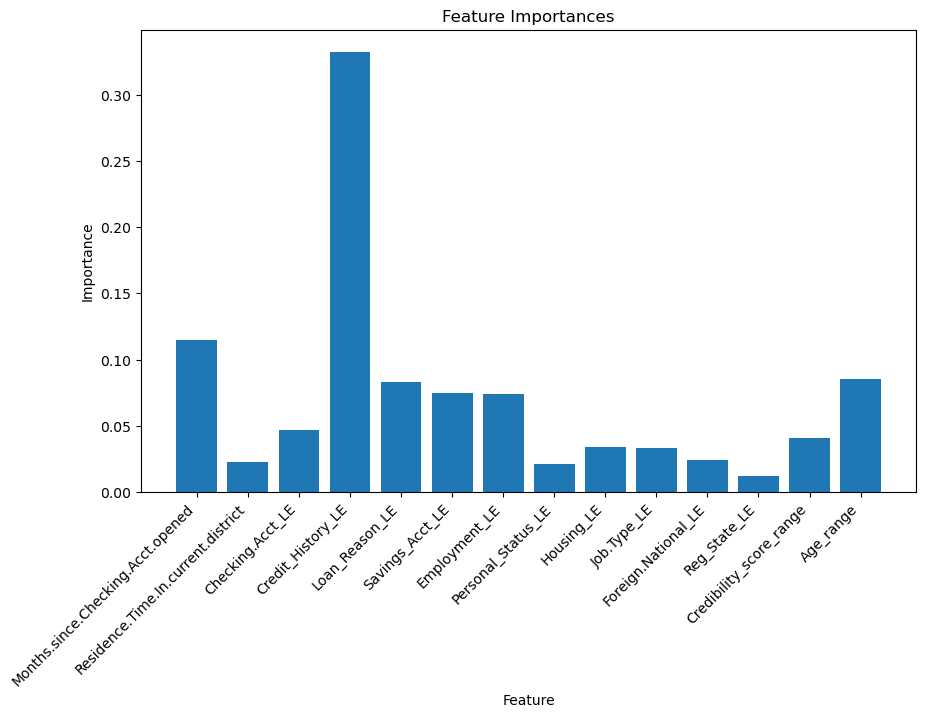

Accuracy: 0.7920792079207921
Decision Tree Rules:
 |--- Credit_History_LE <= 1.50
|   |--- Age_range <= 0.50
|   |   |--- class: 1
|   |--- Age_range >  0.50
|   |   |--- class: 1
|--- Credit_History_LE >  1.50
|   |--- Credit_History_LE <= 2.50
|   |   |--- class: 0
|   |--- Credit_History_LE >  2.50
|   |   |--- class: 1



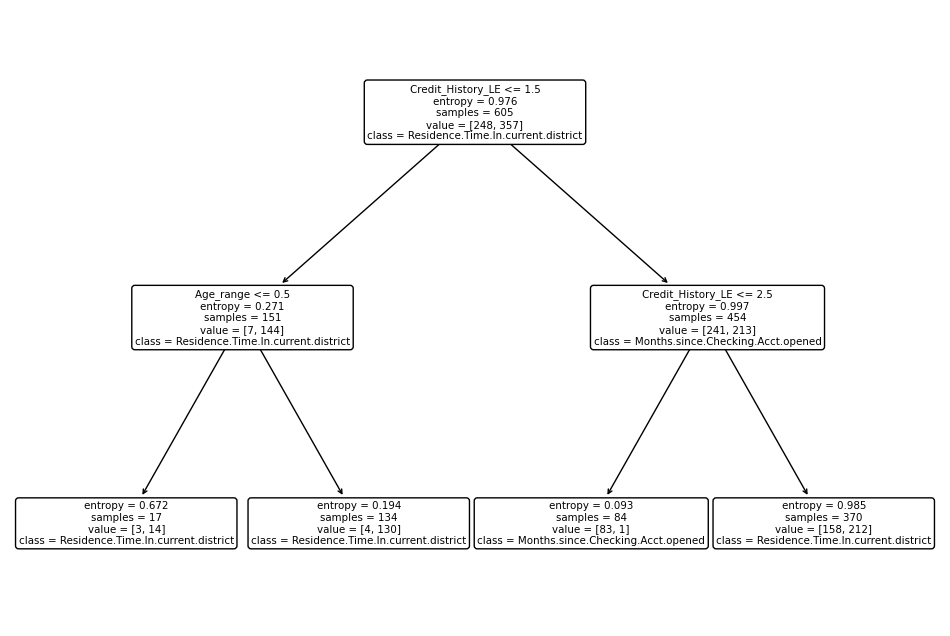

In [43]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=123)

# Fit the model to the training data
decision_tree.fit(X_train_a, Y_train_a)

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Create a DataFrame to display features and importances
importances_df = pd.DataFrame({'Feature': X_train_a.columns, 'Importance': feature_importances})

# Print the result
print("Features and their importance:")
print(importances_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.show()

# Get the Predictions for our predictor variables in test data set
predictions = decision_tree.predict(X_test_a)

# Calculate accuracy
accuracy = accuracy_score(Y_test_a, predictions)
print("Accuracy:", accuracy)

# Convert the target names array to a list
class_names_list = list(X_train_a.columns)

tree = DecisionTreeClassifier(criterion='entropy', random_state=242, max_depth=2)

tree.fit(X_train_a, Y_train_a)

# Display the decision tree as text
tree_rules = export_text(tree, feature_names=X_train_a.columns)
print("Decision Tree Rules:\n", tree_rules)

feature_names_list = X_train_a.columns.tolist()

# Display the decision tree as a diagram using matplotlib
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=feature_names_list, class_names=class_names_list, rounded=True)
plt.show()


In [44]:
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right

# Root node index
root_node_index = 0

# Get the left and right child nodes of the root
left_child = children_left[root_node_index]
right_child = children_right[root_node_index]

# Print information about the next node
print("\nInformation about the next node:")
print("Left Features:", feature_names_list[tree.tree_.feature[left_child]])
print("Left Threshold:", tree.tree_.threshold[left_child])

print("Left Features:", feature_names_list[tree.tree_.feature[right_child]])
print("Left Threshold:", tree.tree_.threshold[right_child])



Information about the next node:
Left Features: Age_range
Left Threshold: 0.5
Left Features: Credit_History_LE
Left Threshold: 2.5


h). Now see if you can improve your results by using a random forest model. Give your results (5 marks) and explain and comment (5 marks).

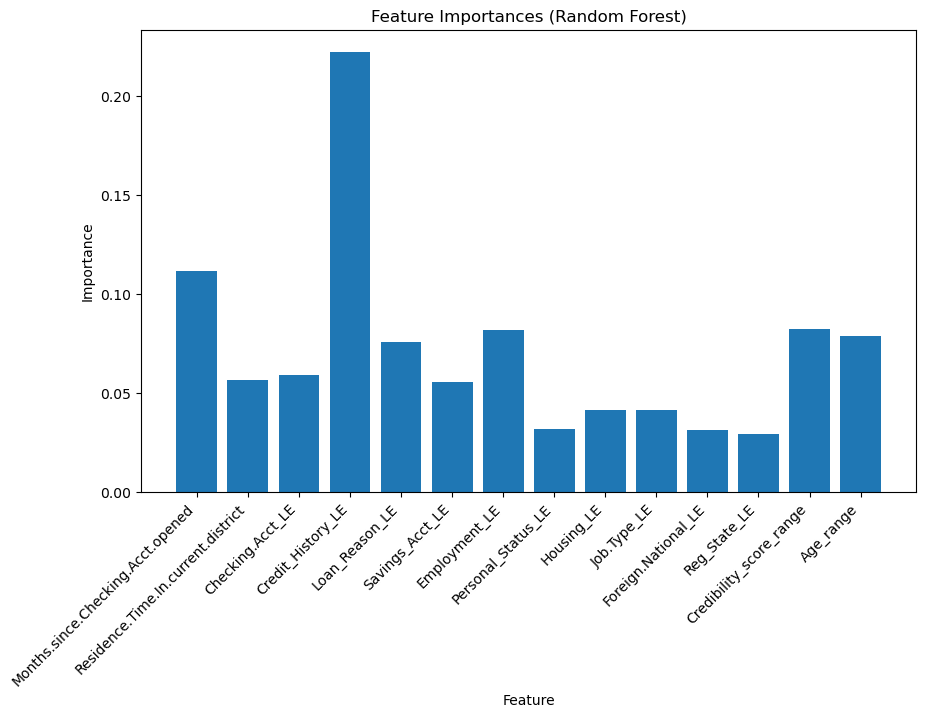

Features and their importance:
                               Feature  Importance
0    Months.since.Checking.Acct.opened    0.111790
1   Residence.Time.In.current.district    0.056473
2                     Checking.Acct_LE    0.059177
3                    Credit_History_LE    0.222540
4                       Loan_Reason_LE    0.075858
5                      Savings_Acct_LE    0.055394
6                        Employment_LE    0.081921
7                   Personal_Status_LE    0.031808
8                           Housing_LE    0.041655
9                          Job.Type_LE    0.041354
10                 Foreign.National_LE    0.031259
11                        Reg_State_LE    0.029368
12             Credibility_score_range    0.082445
13                           Age_range    0.078958
Next best predictor variable: Residence.Time.In.current.district
Accuracy: 0.7425742574257426


In [45]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(criterion='entropy', random_state=123)

# Fit the model to the training data
random_forest.fit(X_train_a, Y_train_a)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to display features and importances
importances_df = pd.DataFrame({'Feature': X_train_a.columns, 'Importance': feature_importances})

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the result
print("Features and their importance:")
print(importances_df)

# Find the next best predictor variable
next_predictor, _ = find_best_predictor(X_train_a, Y_train_a)
print("Next best predictor variable:", next_predictor)

# Get the Predictions for our predictor variables in test data set
predictions = random_forest.predict(X_test_a)

# Calculate accuracy
accuracy = accuracy_score(Y_test_a, predictions)
print("Accuracy:", accuracy)


i). Due to GDPR you are no longer allowed use the following variables to build your model Age, Personal.Status and Foreign.National. Now redo your working for your best model. Give your results and comment.

In [46]:
columns_to_drop = ['Personal_Status_LE', 'Foreign.National_LE', 'Age_range']
predictor_variable_all_GDPR = predictor_variable_all.drop(columns=columns_to_drop, axis=1).copy()
target_variable = working_dataset['check'].copy()

In [47]:
# Set the seed for reproducibility
np.random.seed(242)

# Split the data into training and test sets
X_train_GDPR, X_test_GDPR, Y_train_GDPR, Y_test_GDPR = train_test_split(predictor_variable_all_GDPR, target_variable, test_size=0.25)


In [48]:
# Function to calculate entropy for a set of labels using the given formula
def calculate_entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Function to calculate the information gain for a categorical split
def calculate_categorical_information_gain(data, target, feature):
    unique_values = data[feature].unique()
    total_entropy = calculate_entropy(target)

    weighted_entropy = 0
    for value in unique_values:
        subset_mask = data[feature] == value
        subset_target = target[subset_mask]
        subset_weight = len(subset_target) / len(target)
        weighted_entropy += subset_weight * calculate_entropy(subset_target)

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Find the best categorical feature for the root node split
def find_best_categorical_split(data, target):
    features = data.columns
    best_information_gain = -1
    best_feature = None

    print("Entropy and Information Gain for each categorical feature:")
    for feature in features:
        entropy = calculate_entropy(data[feature])
        information_gain = calculate_categorical_information_gain(data, target, feature)
        print(f"{feature}:Entropy = {entropy} Information Gain = {information_gain}")

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature = feature

    return best_feature

# Identify the best categorical feature for the root node split
root_feature = find_best_categorical_split(X_train_GDPR, Y_train_GDPR)
print("\nBest predictor variable for the root node split:", root_feature)


Entropy and Information Gain for each categorical feature:
Months.since.Checking.Acct.opened:Entropy = 3.709796762027227 Information Gain = 0.05953099051183797
Residence.Time.In.current.district:Entropy = 1.9017900871621465 Information Gain = 0.011330329525416571
Checking.Acct_LE:Entropy = 1.8102021198169236 Information Gain = 0.026064082879681982
Credit_History_LE:Entropy = 1.8846833430327037 Information Gain = 0.29537324513333707
Loan_Reason_LE:Entropy = 2.65982296002503 Information Gain = 0.01951865348116444
Savings_Acct_LE:Entropy = 1.5352472515271176 Information Gain = 0.0038247721470121565
Employment_LE:Entropy = 2.2303484397167708 Information Gain = 0.07008359735184977
Housing_LE:Entropy = 1.2724027783314367 Information Gain = 0.014241732295617648
Job.Type_LE:Entropy = 1.397282306906673 Information Gain = 0.01304706694191804
Reg_State_LE:Entropy = 1.3244107239844025 Information Gain = 0.0022607420067923822
Credibility_score_range:Entropy = 2.4498207495552915 Information Gain = 0

j). Siobhán’s company uses a process that is a mixture of a grading system and human input to grade each past loan as good or bad. Siobhán is suspicious that during a particular time that this process performed poorly. The ID numbers can be taken as time stamp values. Develop a strategy to find a series of consecutive ID numbers, i.e. where these gradings show a higher than normal pattern of suspiciously incorrect or correct gradings. Detail how you go about your investigation.

In [49]:
working_dataset_timestamp = pd.read_csv('Credit_Risk_32_final.csv')

# Crating Timestamp from ID
working_dataset_timestamp['Timestamp'] = pd.to_datetime(working_dataset_timestamp['ID'])



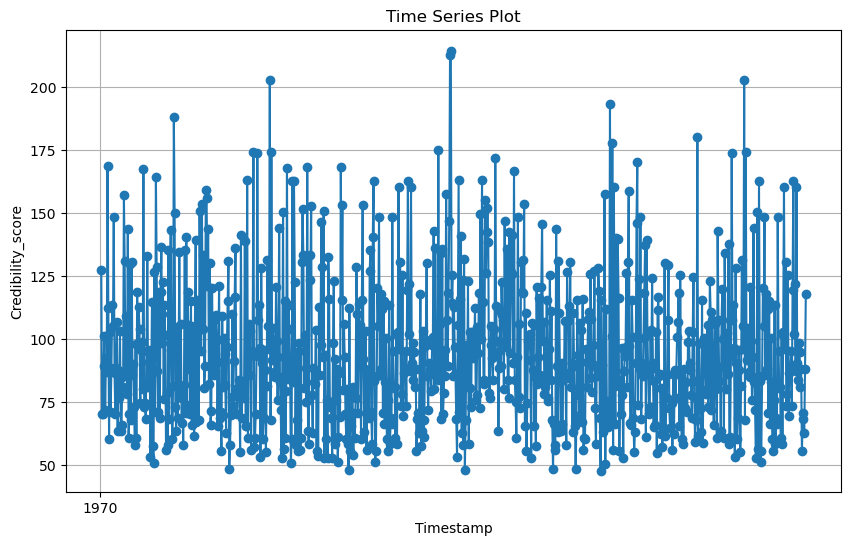

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(working_dataset_timestamp['Timestamp'], working_dataset_timestamp['Credibility_score'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Credibility_score')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

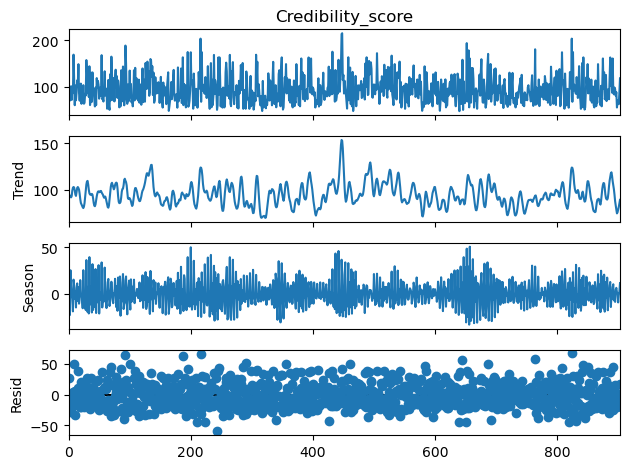

In [51]:
Credibility_score_ = STL(working_dataset_timestamp['Credibility_score'], period=5)
result = Credibility_score_.fit()

result.plot()
plt.show()